In [1]:
import gymnasium as gym
import os
import torch
import pandas as pd
os.chdir('..')
import RL
from RL.algorithm.rlfuse_ppo import Rlfuse_ppo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
import seaborn as sns

import logging
import sys
import datetime

wifi_df = pd.read_csv('../Services/data/new_data/raw.csv')
cam_df = pd.read_csv('../Services/data/new_data/cam_raw.csv')
imu_df = pd.read_csv('../Services/data/new_data/imu_raw.csv')

# To use differen't log level for file and console
timestamp = datetime.datetime.utcnow().strftime('%Y%m%d_%H-%M-%S')
filename=f'tmp5a_{timestamp}.log'
formatter = logging.Formatter('[%(asctime)s] %(name)s {%(filename)s:%(lineno)d} %(levelname)s - %(message)s')

file_handler = logging.FileHandler(filename=filename)
file_handler.setLevel(logging.DEBUG)
file_handler.setFormatter(formatter)

stream_handler = logging.StreamHandler(sys.stdout)
stream_handler.setLevel(logging.INFO)

# The handlers have to be at a root level since they are the final output
logging.basicConfig(
    level=logging.DEBUG,
    format='[{%(filename)s:%(lineno)d} %(levelname)s - %(message)s',
    handlers=[
        file_handler,
        stream_handler
    ]
)

# Test
logger = logging.getLogger(__name__)


env = gym.make('RL/RLfuse-v0')
env.load_data(wifi_df, cam_df, imu_df, timelength=50)
agent_eval = Rlfuse_ppo(env, logger, load_weight=True)

Using cache found in C:\Users\liuxi/.cache\torch\hub\huggingface_pytorch-transformers_main
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:35: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (150, 20)
  logger.warn(
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:35: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (150, 6)
  logger.warn(
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:22: UserWarning: WARN: It seems a Box observation spac

[{rlfuse_ppo.py:75} INFO - Setting up logger...


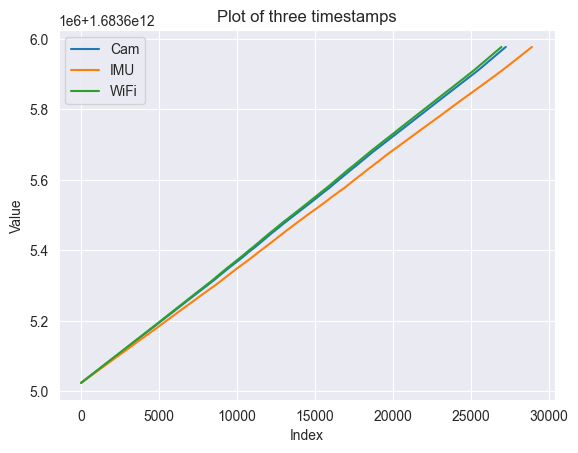

In [14]:
# CUR_IDX = 2000
list_cam = cam_df['timestamp'].drop_duplicates().tolist()
list_imu = imu_df['timestamp'].drop_duplicates().tolist()
list_wifi = wifi_df['timestamp'].drop_duplicates().tolist()

plt.plot(list_cam, label='Cam')
plt.plot(list_imu, label='IMU')
plt.plot(list_wifi, label='WiFi')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of three timestamps')
plt.legend()
plt.show()

In [16]:
CUR_IDX = 1169
def evaluate_model(CUR_IDX):
    obs, info = env.get_evaluate_obs(CUR_IDX)
    action = agent_eval.evaluate_action(obs)
    action_idx, reward = env.evaluate_action(action)
    return obs,  info, action_idx, reward
obs, info, action_idx, reward = evaluate_model(CUR_IDX)
wifi_names = obs[0]
wifi_rssis = obs[1]
imu_vis = obs[2]
cam_vis = obs[3]

data = []
for names_row, rssi_row in zip(wifi_names, wifi_rssis):
    row_dict = {}
    for name, rssi in zip(names_row, rssi_row):
        row_dict[name] = rssi
    data.append(row_dict)
print(CUR_IDX, sum(reward))

1169 22


In [12]:
CUR_IDX_list = np.random.randint(0, 2500, size=10)
success_list = []
for idx in CUR_IDX_list:
    obs, info, action_idx, reward = evaluate_model(idx)
    print(idx, sum(reward))
    if sum(reward) / len(reward) >= 0.5:
        success_list.append(1)
    else:
        success_list.append(0)
print(sum(success_list)/10)

2051 48
1169 20
1136 33
1580 45
1775 46
1016 50
1889 39
1575 46
2350 50
2442 50
0.9


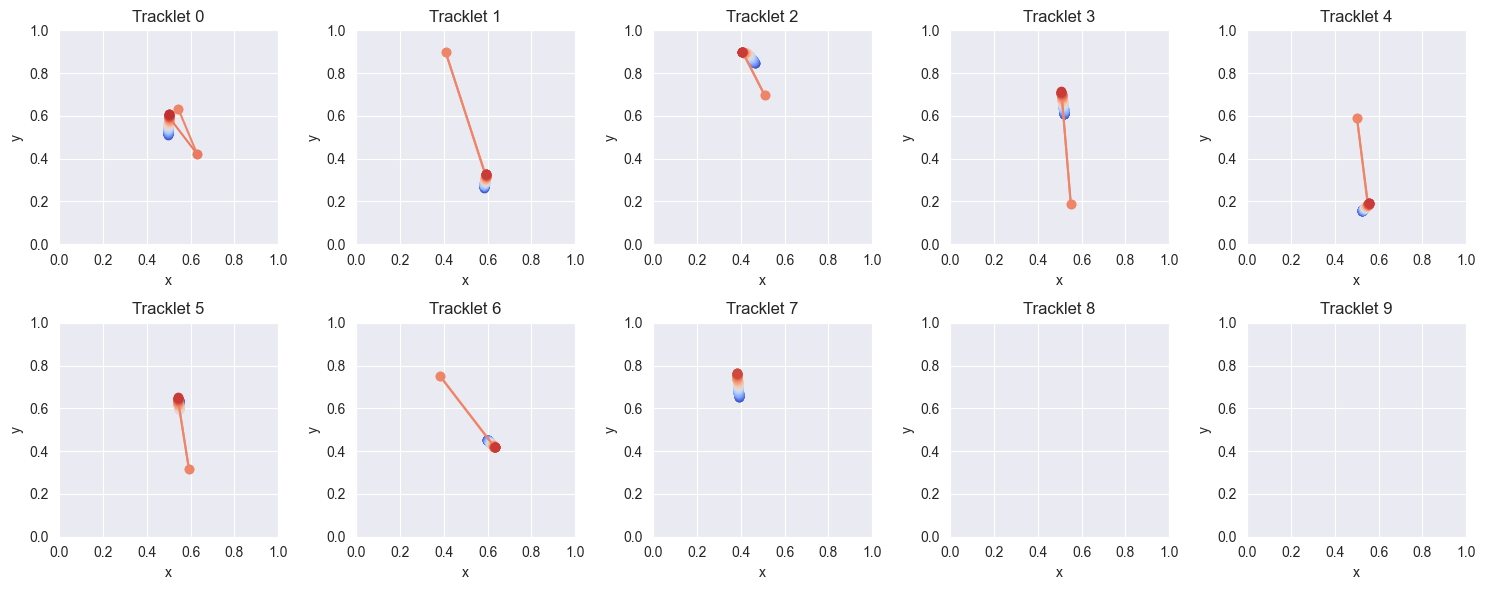

In [17]:
# Set up a 2x5 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Flatten the axes array for easier indexing
axes_flat = axes.flatten()

# Create a colormap and normalize the timesteps
colormap = get_cmap('coolwarm')
norm = Normalize(vmin=0, vmax=len(cam_vis))

# Iterate through each tracklet and plot it in a subplot
for i in range(10):
    tracklet = cam_vis[:, i, :]
    # Ignore data points with value (0.0, 0.0)
    non_zero_mask = np.any(tracklet != 0.0, axis=1)
    tracklet_filtered = tracklet[non_zero_mask]

    x, y = tracklet_filtered[:, 0], tracklet_filtered[:, 1]

    # Plot the points with gradient color from blue to red
    for j in range(len(x) - 1):
        axes_flat[i].plot(x[j:j+2], y[j:j+2], marker='o', color=colormap(norm(j)))

    axes_flat[i].set_title(f'Tracklet {i}')
    axes_flat[i].set_xlabel('x')
    axes_flat[i].set_ylabel('y')

    # Set x and y axis limits
    axes_flat[i].set_xlim(0, 1)
    axes_flat[i].set_ylim(0, 1)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [18]:
info["label"]

[['BP_AI_C_6',
  'BP_AI_C_0',
  'BP_AI_C_1',
  'BP_AI_C_3',
  'BP_AI_C_4',
  'BP_TargetAI_C_0',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_6',
  'BP_AI_C_0',
  'BP_AI_C_1',
  'BP_AI_C_3',
  'BP_AI_C_4',
  'BP_TargetAI_C_0',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_6',
  'BP_AI_C_0',
  'BP_AI_C_1',
  'BP_AI_C_3',
  'BP_AI_C_4',
  'BP_TargetAI_C_0',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_6',
  'BP_AI_C_0',
  'BP_AI_C_1',
  'BP_AI_C_3',
  'BP_AI_C_4',
  'BP_TargetAI_C_0',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_6',
  'BP_AI_C_0',
  'BP_AI_C_1',
  'BP_AI_C_3',
  'BP_AI_C_4',
  'BP_TargetAI_C_0',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_6',
  'BP_AI_C_0',
  'BP_AI_C_1',
  'BP_AI_C_3',
  'BP_AI_C_4',
  'BP_TargetAI_C_0',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_6',
  'BP_AI_C_0',
  'BP_AI_C_1',
  'BP_AI_C_3',
  'BP_AI_C_4',
  'BP_TargetAI_C_0',
  'BP_AI_C_7',
  'BP_AI_C_8'],
 ['BP_AI_C_6',
  'BP_AI_C_0',
  'BP_AI_C_1',
  'BP_AI_C_3',
  'BP_AI_C_4',
  'BP_TargetAI_C_0',
  'BP_AI_C_7',


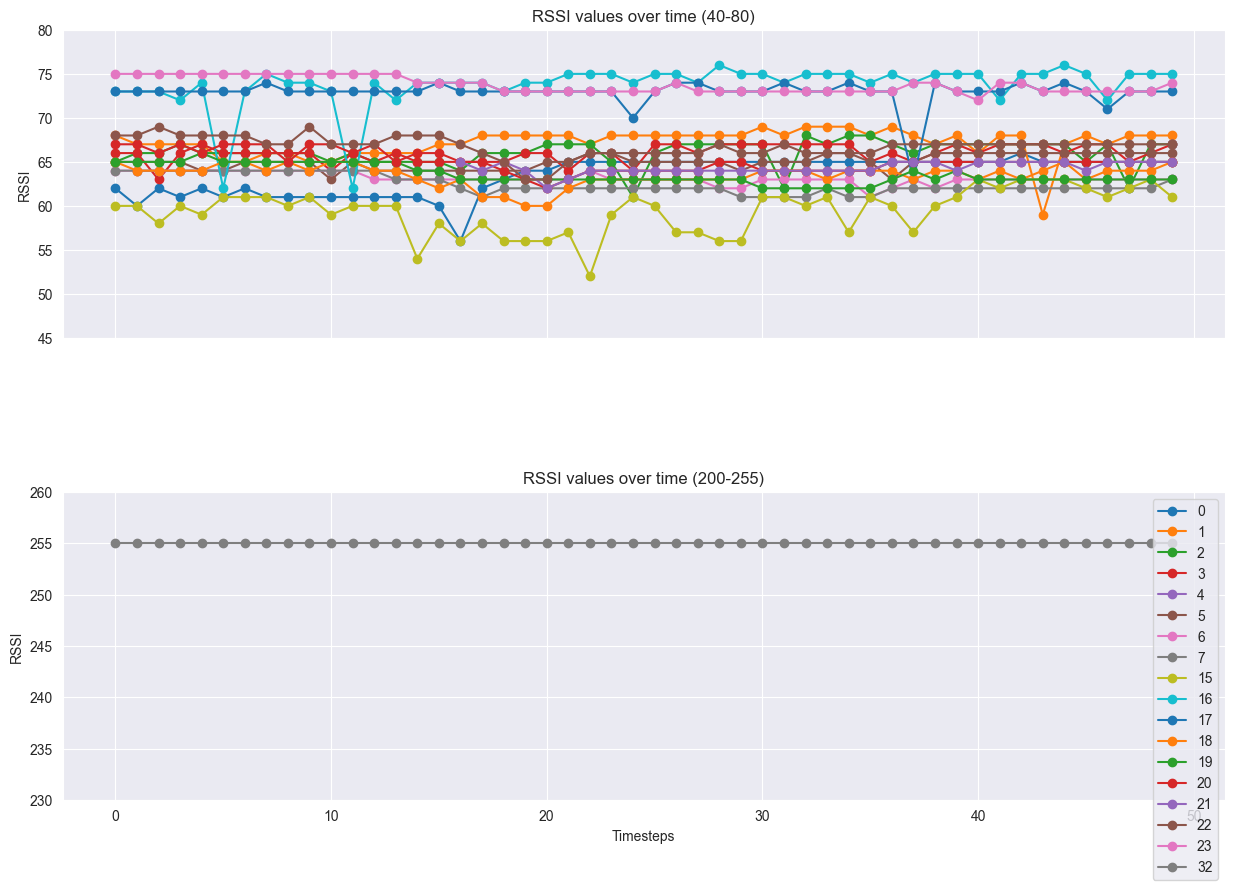

In [20]:
def plot_rssi(data, timesteps):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    fig.subplots_adjust(hspace=0.5)  # Add space between subplots
    plt.xlabel("Timesteps")

    ax1.set_ylabel("RSSI")
    ax1.set_ylim(45, 80)
    ax1.set_title("RSSI values over time (40-80)")

    ax2.set_ylabel("RSSI")
    ax2.set_ylim(230, 260)
    ax2.set_title("RSSI values over time (200-255)")

    all_names = sorted(set().union(*data))  # Get all unique names from the data

    for name in all_names:
        rssi_values = []
        for timestep in range(timesteps):
            rssi_values.append(data[timestep].get(name, None))

        ax1.plot(range(timesteps), rssi_values, marker='o', label=name)
        ax2.plot(range(timesteps), rssi_values, marker='o', label=name)

    # ax1.legend()
    ax2.legend()
    plt.show()

plot_rssi(data, 50)

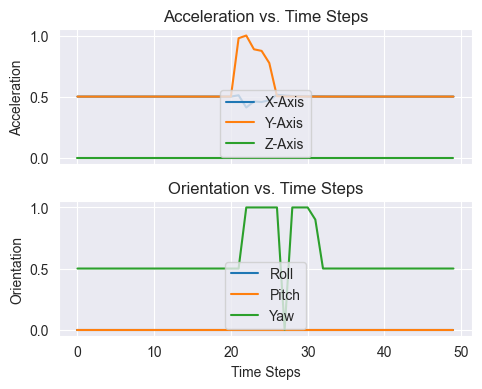

In [19]:
ax, ay, az, roll, pitch, yaw = imu_vis.T

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4), sharex=True)

# Acceleration
ax1.plot(ax, label='X-Axis')
ax1.plot(ay, label='Y-Axis')
ax1.plot(az, label='Z-Axis')
ax1.set_ylabel('Acceleration')
ax1.set_title('Acceleration vs. Time Steps')
ax1.legend()

# Orientation
ax2.plot(roll, label='Roll')
ax2.plot(pitch, label='Pitch')
ax2.plot(yaw, label='Yaw')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Orientation')
ax2.set_title('Orientation vs. Time Steps')
ax2.legend()

fig.tight_layout()
plt.show()

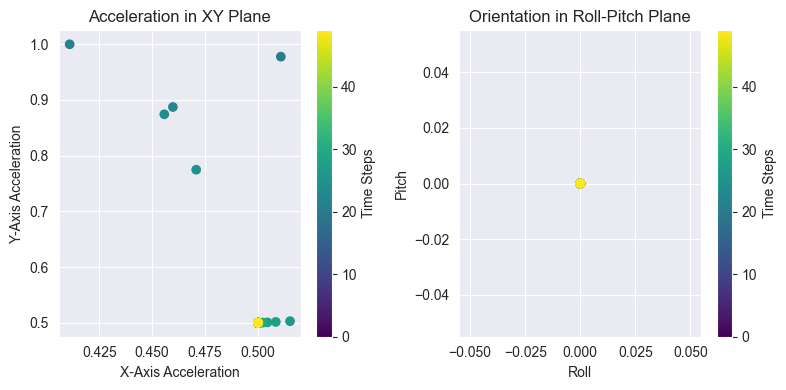

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Acceleration
scatter1 = ax1.scatter(ax, ay, c=np.arange(len(ax)), cmap='viridis')
ax1.set_xlabel('X-Axis Acceleration')
ax1.set_ylabel('Y-Axis Acceleration')
ax1.set_title('Acceleration in XY Plane')
fig.colorbar(scatter1, ax=ax1).set_label('Time Steps')

# Orientation
scatter2 = ax2.scatter(roll, pitch, c=np.arange(len(roll)), cmap='viridis')
ax2.set_xlabel('Roll')
ax2.set_ylabel('Pitch')
ax2.set_title('Orientation in Roll-Pitch Plane')
fig.colorbar(scatter2, ax=ax2).set_label('Time Steps')

fig.tight_layout()
plt.show()

In [21]:
action_idx

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 3,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 3,
 5,
 3,
 3,
 5,
 5,
 5,
 3,
 5,
 5,
 3,
 5,
 5,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

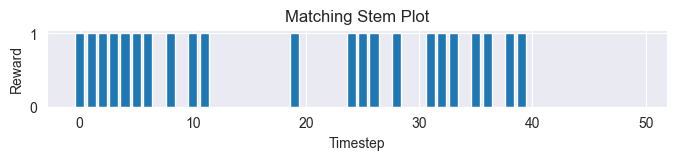

In [22]:
plt.figure(figsize=(8, 1))
plt.bar(np.arange(len(reward)), reward)
plt.xlabel('Timestep')
plt.ylabel('Reward')
plt.title('Matching Stem Plot')
plt.show()

In [14]:
sum(reward)

159

In [27]:
import torch.nn as nn
bn = nn.BatchNorm1d(64)
test = torch.randn(1, 50, 64)
out = bn(test)

RuntimeError: running_mean should contain 50 elements not 64

In [143]:
init_cov_var = torch.full(size=(10,), fill_value=0.05)
init_cov_var

tensor([0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
        0.0500])

In [142]:
-0.000009 * 100000

-0.9

In [145]:
cov_var = init_cov_var * np.exp(-0.000009 * 150000)
cov_var

tensor([0.0130, 0.0130, 0.0130, 0.0130, 0.0130, 0.0130, 0.0130, 0.0130, 0.0130,
        0.0130])

In [113]:
min_cov_var = torch.full(size=(10,), fill_value=0.01)
min_cov_var

tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100])

In [134]:
final_cov_var = np.maximum(cov_var, min_cov_var)
final_cov_var

tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100])